In [1]:
# import pandas
import pandas as pd


In [2]:
# create some test data
sample = [{'attributes': {'Cluster': 'sierra001',
                        'ProxyServer': 'rogerwilco, laurabow',
                        'Health': 'Healthy',
                        'MetricApp': 'fullSWEEP',
                        'Status': 'connected',
                        'PolicyStatus': 'enabled',
                        'Node': 'sierra001a',
                        'VMplatform': 'VirtPlat006',
                        'SampleTime': '11/05/1955 09:10:43'},
            'dataPoints': {'aborted_requests': 0,
                        'outstanding_requests': 1,
                        'max_request_latency': 2010,
                        'outstanding_requests': 0,
                        'processed_requests': 0},
            'identifiers': {'sampleID': 'VirtPlat006_fullSWEEP_3a'},
            'name': 'VirtPlat006_fullSWEEP_3a',
            'cores': 6,
            'memory': 4112},
        {'attributes': {'Cluster': 'sierra001',
                        'ProxyServer': 'rogerwilco, laurabow',
                        'Health': 'Healthy',
                        'MetricApp': 'fullSWEEP',
                        'Status': 'connected',
                        'PolicyStatus': 'enabled',
                        'Node': 'sierra001a',
                        'VMplatform': 'VirtPlat006',
                        'SampleTime': '11/05/1955 09:10:43'},
            'dataPoints': {'aborted_requests': 0,
                        'outstanding_requests': 1,
                        'max_request_latency': 3088,
                        'outstanding_requests': 0,
                        'processed_requests': 0},
            'identifiers': {'sampleID': 'VirtPlat006_fullSWEEP_3a'},
            'name': 'VirtPlat006_fullSWEEP_3b',
            'cores': 2,
            'memory': 2056},
         {'attributes': {'Cluster': 'sierra001',
                        'ProxyServer': 'rogerwilco, laurabow',
                        'Health': 'Healthy',
                        'MetricApp': 'fullSWEEP',
                        'Status': 'connected',
                        'PolicyStatus': 'enabled',
                        'Node': 'sierra001a',
                        'VMplatform': 'VirtPlat006',
                        'SampleTime': '11/05/1955 09:10:43'},
            'dataPoints': {'aborted_requests': 0,
                        'outstanding_requests': 1,
                        'max_request_latency': 160,
                        'outstanding_requests': 0,
                        'processed_requests': 0},
            'identifiers': {'sampleID': 'VirtPlat006_fullSWEEP_3a'},
            'name': 'VirtPlat006_fullSWEEP_3c',
            'cores': 2,
            'memory': 1028},
                  {'attributes': {'Cluster': 'sierra001',
                        'ProxyServer': 'rogerwilco, laurabow',
                        'Health': 'Healthy',
                        'MetricApp': 'fullSWEEP',
                        'Status': 'connected',
                        'PolicyStatus': 'enabled',
                        'Node': 'sierra001a',
                        'VMplatform': 'VirtPlat006',
                        'SampleTime': '11/05/1955 09:10:43'},
            'dataPoints': {'aborted_requests': 0,
                        'outstanding_requests': 1,
                        'max_request_latency': 4860,
                        'outstanding_requests': 0,
                        'processed_requests': 0},
            'identifiers': {'sampleID': 'VirtPlat006_fullSWEEP_3a'},
            'name': 'VirtPlat006_fullSWEEP_3d',
            'cores': 1,
            'memory': 1028}]

In [3]:
# turn the entire "sample" into a dataframe
mydf = pd.DataFrame(sample)

In [4]:
# the value mydf.dataPoints is a dictionary, one value within that dict is max_request_latency
mydf.dataPoints.apply(pd.Series)

,aborted_requests,outstanding_requests,max_request_latency,processed_requests
0,0,0,2010,0
1,0,0,3088,0
2,0,0,160,0
3,0,0,4860,0


In [5]:
# we don't have a problem selecting just the data we wish to view
mydf.dataPoints.apply(pd.Series).max_request_latency

0    2010
1    3088
2     160
3    4860
Name: max_request_latency, dtype: int64

In [6]:
# if creating a dataframe from a pre-existing dataframe, be sure to use .copy() if you want a deep copy
# remember, using "df2 = mydf[['name']]" will result in a shallow copy, df2 pointing to the same object as mydf['name']
df2 = mydf[['name']].copy()
df2

,name
0,VirtPlat006_fullSWEEP_3a
1,VirtPlat006_fullSWEEP_3b
2,VirtPlat006_fullSWEEP_3c
3,VirtPlat006_fullSWEEP_3d


In [7]:
# using join we can combine two dataframes provided they share a common index
df2 = df2.join(mydf.dataPoints.apply(pd.Series).max_request_latency.copy())
df2

,name,max_request_latency
0,VirtPlat006_fullSWEEP_3a,2010
1,VirtPlat006_fullSWEEP_3b,3088
2,VirtPlat006_fullSWEEP_3c,160
3,VirtPlat006_fullSWEEP_3d,4860


<Axes: xlabel='name'>

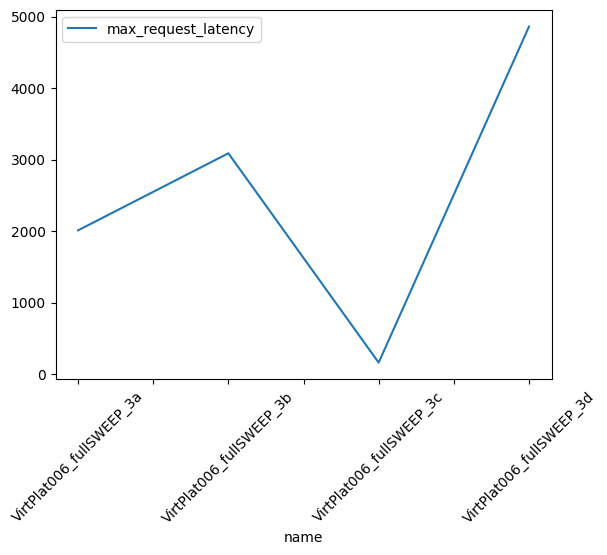

In [8]:
# from the new dataframe, produce a plot graph
# instruct the plot graph to use the "name" column to plot X
df2.plot(x='name', rot=45)

In [9]:
# reassign "mydf" to the result of joining "mydf" with the information returned by 
# "mydf.dataPoints.apply(pd.Series).max_request_latency)"
mydf = mydf.join(mydf.dataPoints.apply(pd.Series).max_request_latency)
# display the new columns
mydf.columns 

Index(['attributes', 'dataPoints', 'identifiers', 'name', 'cores', 'memory',
       'max_request_latency'],
      dtype='object')

<Axes: xlabel='name'>

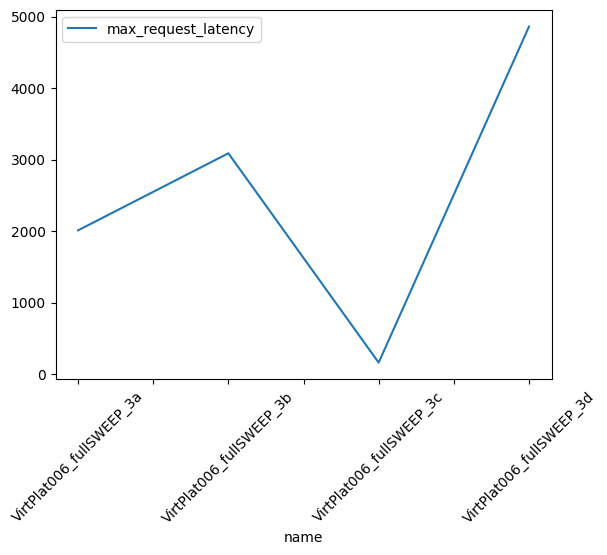

In [10]:
# "x='name' ensures that the x-axis uses the "name" column
# "y='max_request_latency" ensures that the y-axis uses the "max_request_latency" column
# 
# NOTE: attempting to pass "y=mydf.dataPoints.apply(pd.Series).max_request_latenecy" will result in an error
#
mydf.plot(x='name', y='max_request_latency', rot=45)

In [11]:
# create a bool mask to isolate systems that are having excessive response times
mymask = mydf['max_request_latency'] > 1000
# display our data with the boolean mask applied
mydf[mymask]

,attributes,dataPoints,identifiers,name,cores,memory,max_request_latency
0,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3a,6,4112,2010
1,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3b,2,2056,3088
3,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3d,1,1028,4860


<Axes: title={'center': 'Servers with Response times Over 1000ms'}, ylabel='max_request_latency'>

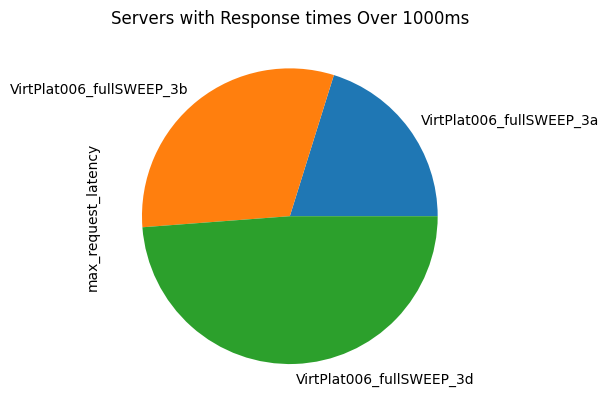

In [12]:
# create a piechart using our boolean mask
mydf[mymask].plot.pie(legend=False, y='max_request_latency', title="Servers with Response times Over 1000ms", labels=mydf[mymask]['name'])

In [13]:
# select records with more than a single core
mymask = (mydf['cores'] > 1)
mydf[mymask]

,attributes,dataPoints,identifiers,name,cores,memory,max_request_latency
0,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3a,6,4112,2010
1,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3b,2,2056,3088
2,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3c,2,1028,160


In [16]:
# the following mask will return those records that have more than 1 more and more than 1028 gigs of memory
mymask = (mydf['cores'] > 1) & (mydf['memory'] > 1028)
# apply the mask
mydf[mymask]

,attributes,dataPoints,identifiers,name,cores,memory,max_request_latency
0,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3a,6,4112,2010
1,"{'Cluster': 'sierra001', 'ProxyServer': 'roger...","{'aborted_requests': 0, 'outstanding_requests'...",{'sampleID': 'VirtPlat006_fullSWEEP_3a'},VirtPlat006_fullSWEEP_3b,2,2056,3088
